In [20]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [74]:
E_0 = 8.85418782E-12 # \epsilon_0
u_0 = 1.25663706E-6 # \mu_0

'''w = 0.498 # length of capacitor
a = 0.011 # outer radius of inner pipe
b = 0.013 # inner radius of outer pipe'''

l_c = 0.498 # +- 0.001 meters length of the cylidrical capacitor
a_c = (0.022326)/2 # outside diameter divided by 2 for radius
b_c = (0.026264)/2 # same as above

C_calc = ((2*np.pi*E_0*l_c)/(np.log(b_c/a_c)))
print("Calculated capacitance of premade capacitor: %s nF" % (C_calc*10**9))

Calculated capacitance of premade capacitor: 0.170547574204 nF


Actuall measuremnts of the coils we wound:
first the small coil, then the one we ended up using which was a bit larger in size and turns. 

In [22]:
f_target = 5.0E5 # Hz

omega_target = 2*np.pi*f_target # omega(the resonant freq) is 2pi*f

#C = 1.65844E-10 # capacitance of pre-made capacitor
L_target = 1/((omega_target**2)*C_calc) # target inductance to make target resonant frequency (from equation 1)
print('ballpark inductance = %s mH' % (L_target*10**3))

ballpark inductance = 0.594093373154 mH


In [23]:
n1 = 150 # turns on the solinoid 
inductor1Length = .13256 # m
inductor1Radius = 0.026694 # m
L_small = ((u_0*np.pi*(n1**2)*(inductor1Radius**2))/inductor1Length)
print('inductance of small coil: %s mH' % (L_small*10**3))


ws = 1/np.sqrt(L_small*C_calc)
fs = ws/(2*np.pi)

print('first aproximation of thoretical frequency for small inductor = %s Khz' % (fs*10**-3))
#print('coil density = %s (turns per cm)' % (n1/(inductor1Length*10**2)))
#N = np.sqrt((L_target*inductorLength)/(u_0*np.pi*(inductorRadius**2)))

#print('Number of turns = %s' % round(N))

inductance of small coil: 0.4774820735335626 mH
first aproximation of thoretical frequency for small inductor = 557.72334415 Khz


In [24]:
n2 = 575 # turns on the solinoid
inductor2Length = 0.509
inductor2Radius = (0.0782 - 0.00086)/2

L_large = ((u_0*np.pi*(n2**2)*(inductor2Radius**2))/inductor2Length)
print('inductance of large coil: %s mH' % (L_large*10**3))

wl = 1/np.sqrt(L_large*C_calc)
fl = wl/(2*np.pi)

print('first aproximation of thoretical frequency for large inductor = %s Khz' % (fl*10**-3))
#print('coil density = %s (turns per cm)' % (n2/(inductor2Length*10**2)))

inductance of large coil: 3.834652266330525 mH
first aproximation of thoretical frequency for large inductor = 196.804200987 Khz


These first values gave us a rough area in which to look for amplitude peaks. 

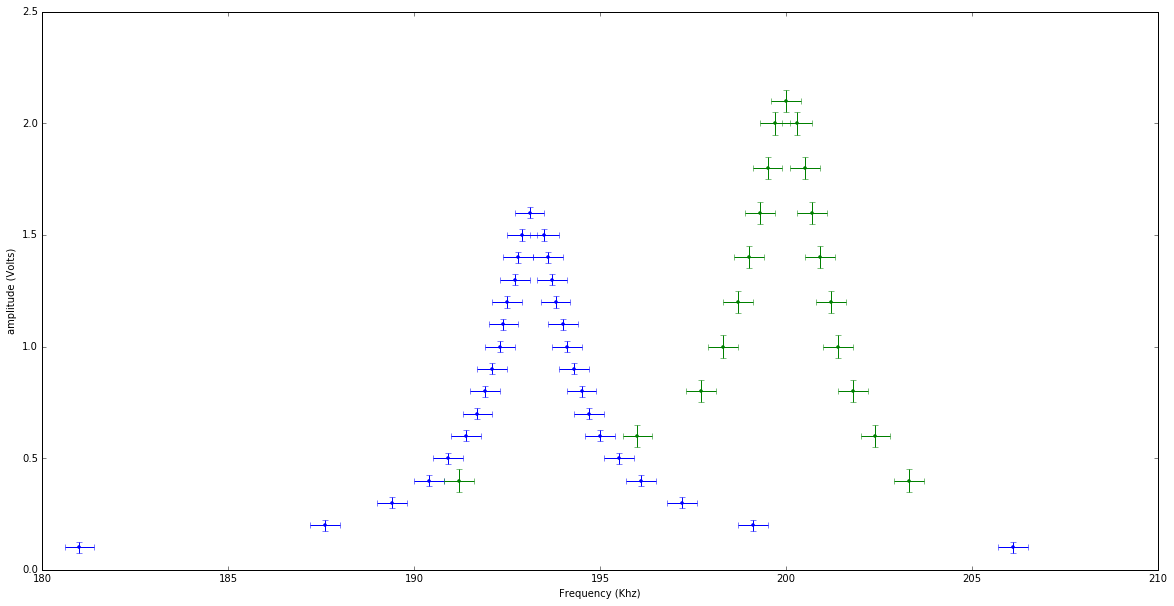

In [69]:
#frequency Khz, amplitude Volts, phase microseconds
a = np.genfromtxt('data.txt', delimiter = ',')
#print(a)
b = np.genfromtxt('8kResistorLargeCoil1.txt', delimiter = ',')
c = np.genfromtxt('smallCoil1.txt', delimiter = ',')

plt.figure(figsize = (20,10))
plt.errorbar(a[ :,0],a[:,1], xerr=0.4, yerr=0.025, marker = 'o', linestyle = 'None')
plt.xlabel('Frequency (Khz)')
plt.ylabel('amplitude (Volts)')

plt.errorbar(b[ :,0],b[:,1], xerr=0.4, yerr=0.05, marker = 'o', linestyle = 'None')
#plt.plot(a[ :,0],a[:,1],'+', linestyle = 'None' )
#plt.plot(b[ :,0],b[:,1], 'o')
#plt.plot(c[ :,0],c[:,1], 'o')
#plt.plot(a[ :,0], a[ :,2])
#plt.plot(165.8,1,'o')

plt.show()



In [70]:
'''

data1 +- .025 volts and +- 0.1 khz

8data +- 0.05 volts and +- 0.1 khz
SmallData +- 0.25 volts and +- 1khz

'''


'\n\ndata1 +- .025 volts and +- 0.1 khz\n\n8data +- 0.05 volts and +- 0.1 khz\nSmallData +- 0.25 volts and +- 1khz\n\n'

In [79]:
f = 193e3

speedOfLight = ((2*np.pi**2*f*inductor2Radius*n2)*np.sqrt((2*l_c)/(inductor2Length*np.log(b_c/a_c))))
print(format(speedOfLight,"e"))

actuall_c = 2.99794e8

100*((actuall_c - speedOfLight)/speedOfLight)

2.939975e+08


1.9716130437322215

In [81]:
# now with correction factors

gamma_c = ((b_c-a_c)/(np.pi*l_c))*np.log((np.pi*l_c)/(b_c-a_c))